### Movie Revenue Prediction

**Aim:** Predict the worldwide gross revenue of movies based on features like budget, runtime, genre, and release year.

**Objective:**
1. Pre-processing the data
2. Exploratory Data Analysis with SQL 
3. Exploratory Data Analysis with Data Visualization
4. Predictive Model using **Linear Regression**
5. Model Acurracy Evaluation

**Resource** : [Kaggle Dataset - IMDb Movies Data Collection](https://www.kaggle.com/datasets/hetbabariya/imdb-movies-data-collection-5000-records)

**Skill:** sqlalchemy, matplotlib, seaborn, sklearn, pandas, numpy 

#### Installing packages

In [29]:
!pip install sqlalchemy
!pip install -q pandas
!pip install ipython-sql
!pip install ipython-sql prettytable

#### Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Create dataframe from csv file

In [31]:
file_path=r"C:\Users\Admin\OneDrive\Desktop\Data Science\personal projects\datasets\IMDB_Movies_Dataset.csv"

In [32]:
movie_data = pd.read_csv(file_path)
movie_data.head()

,Unnamed: 0,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
0,0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes
1,1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes
2,2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes
3,3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes
4,4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes


In [33]:
movie_data.describe()

,Unnamed: 0,Average Rating,Metascore
count,4989.000000,4989.000000,3055.000000
mean,248.951493,7.632892,74.684452
std,144.036753,0.365243,12.298911
min,0.000000,7.200000,25.000000
25%,124.000000,7.300000,67.000000
50%,249.000000,7.600000,76.000000
75%,374.000000,7.800000,84.000000
max,499.000000,9.300000,100.000000


In [34]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4989 non-null   int64  
 1   Title              4989 non-null   object 
 2   Average Rating     4989 non-null   float64
 3   Director           4989 non-null   object 
 4   Writer             4988 non-null   object 
 5   Metascore          3055 non-null   float64
 6   Cast               4982 non-null   object 
 7   Release Date       4989 non-null   object 
 8   Country of Origin  4986 non-null   object 
 9   Languages          4968 non-null   object 
 10  Budget             2651 non-null   object 
 11  Worldwide Gross    3895 non-null   object 
 12  Runtime            4989 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 506.8+ KB


In [35]:
movie_data.shape

(4989, 13)

#### Data Pre-processing
"Budget" and "Worldwide Gross" have string pattern like "$6,000,000 (estimated)"
- Cleaning the columns to remove string pattern and coverting to float

"Release Date" is also a string "October 14, 1994 (India)"
- Coverting the column to float and reduce to "Release Year"

In [36]:
import re

def clean_and_convert(value):
    if isinstance(value, str):
        # Remove unwanted characters like $, commas, and extra text
        value = re.sub(r'[\$,]', '', value)  # Remove $ and ,
        value = re.sub(r'\(.*?\)', '', value)  # Remove text within parentheses
    try:
        return float(value)  # Convert to float
    except (ValueError, TypeError):
        return None  # Return None for invalid entries

In [37]:
movie_data['Budget'] = movie_data['Budget'].apply(clean_and_convert)
movie_data['Worldwide Gross'] = movie_data['Worldwide Gross'].apply(clean_and_convert)

# Extract year from Release Date
movie_data['Release Year'] = movie_data['Release Date'].str.extract(r'(\d{4})')[0].astype(int)

# Drop an index column
movie_data.drop("Unnamed: 0",axis=1, inplace=True)
movie_data.head()

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,Release Year
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,25000000.0,29332133.0,2 hours 22 minutes,1994
1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,3513659.0,2 hours 25 minutes,2024
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin",6000000.0,250342198.0,2 hours 55 minutes,1978
3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes,1975
4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes,2001


In [38]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              4989 non-null   object 
 1   Average Rating     4989 non-null   float64
 2   Director           4989 non-null   object 
 3   Writer             4988 non-null   object 
 4   Metascore          3055 non-null   float64
 5   Cast               4982 non-null   object 
 6   Release Date       4989 non-null   object 
 7   Country of Origin  4986 non-null   object 
 8   Languages          4968 non-null   object 
 9   Budget             2066 non-null   float64
 10  Worldwide Gross    3879 non-null   float64
 11  Runtime            4989 non-null   object 
 12  Release Year       4989 non-null   int32  
dtypes: float64(4), int32(1), object(8)
memory usage: 487.3+ KB


#### Filling the Missing Values

In [39]:
movie_data.isnull().sum()

Title                   0
Average Rating          0
Director                0
Writer                  1
Metascore            1934
Cast                    7
Release Date            0
Country of Origin       3
Languages              21
Budget               2923
Worldwide Gross      1110
Runtime                 0
Release Year            0
dtype: int64

In [40]:
metascore_mean = movie_data["Metascore"].mean()
movie_data["Metascore"].fillna(metascore_mean, inplace=True)

buget_avg = movie_data["Budget"].mean()
movie_data["Budget"] = movie_data["Budget"].replace(np.nan, buget_avg)
print(f"Buget mean : {buget_avg}")

ww_gross_mean = movie_data["Worldwide Gross"].mean()
movie_data["Worldwide Gross"] = movie_data["Worldwide Gross"].replace(np.nan, ww_gross_mean)
print(f"Worldwide Gross : {ww_gross_mean}")

movie_data.isnull().sum()

Buget mean : 27636745.863988385
Worldwide Gross : 66483646.49136376


Title                 0
Average Rating        0
Director              0
Writer                1
Metascore             0
Cast                  7
Release Date          0
Country of Origin     3
Languages            21
Budget                0
Worldwide Gross       0
Runtime               0
Release Year          0
dtype: int64

In [41]:
movie_data.head()

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime,Release Year
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.000000,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,2.500000e+07,2.933213e+07,2 hours 22 minutes,1994
1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",74.684452,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,2.763675e+07,3.513659e+06,2 hours 25 minutes,2024
2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.000000,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin",6.000000e+06,2.503422e+08,2 hours 55 minutes,1978
3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",74.684452,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,2.763675e+07,6.648365e+07,1 hour 25 minutes,1975
4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",74.684452,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,2.763675e+07,6.648365e+07,2 hours 15 minutes,2001


covert runtime object to int

In [67]:
import re

def convert_runtime_to_minutes(runtime):
    if isinstance(runtime, str):
        # Extract hours and minutes using regex
        hours = re.search(r'(\d+)\s*hour', runtime)
        minutes = re.search(r'(\d+)\s*minute', runtime)
        
        # Convert to total minutes
        total_minutes = 0
        if hours:
            total_minutes += int(hours.group(1)) * 60
        if minutes:
            total_minutes += int(minutes.group(1))
        return total_minutes
    return None  # Return None for invalid entries

movie_data['Runtime'] = movie_data['Runtime'].apply(convert_runtime_to_minutes)


In [42]:
movie_data.dtypes

Title                 object
Average Rating       float64
Director              object
Writer                object
Metascore            float64
Cast                  object
Release Date          object
Country of Origin     object
Languages             object
Budget               float64
Worldwide Gross      float64
Runtime               object
Release Year           int32
dtype: object

In [43]:
movie_data["Average Rating"].value_counts()

Average Rating
7.3    679
7.2    637
7.4    588
7.5    580
7.6    511
7.7    409
7.8    342
7.9    274
8.0    254
8.1    223
8.2    165
8.3    104
8.4     62
8.5     57
8.6     30
8.7     30
8.8     21
8.9      9
9.0      7
9.2      3
9.1      2
9.3      2
Name: count, dtype: int64

In [44]:
movie_data["Languages"].value_counts()

Languages
English                   1514
Hindi                      239
Japanese                   160
English, Spanish           142
French                     130
                          ... 
Spanish, Maya, English       1
French, Romanian             1
Turkish, Georgian            1
Malayalam, German            1
Turkish, French              1
Name: count, Length: 1084, dtype: int64

In [45]:
movie_data["Country of Origin"].value_counts()

Country of Origin
United States                             1624
India                                      583
Japan                                      206
United Kingdom, United States              167
United Kingdom                             164
                                          ... 
France, Italy, West Germany, Chile           1
United Kingdom, Ireland, France              1
Chile, Spain, United Kingdom, France         1
Czech Republic, United Kingdom, France       1
Israel, Switzerland, Germany, France         1
Name: count, Length: 812, dtype: int64

#### Exploratory Data Analysis (with SQL)

In [49]:
%load_ext sql

In [50]:
import prettytable
prettytable.DEFAULT = 'DEFAULT'

In [51]:
import sqlite3
# Create a connection to SQLite database (or change for another DB)
conn = sqlite3.connect('movies.db')
cursor = conn.cursor()


In [52]:
%sql sqlite:///movies.db

In [53]:
# Write the DataFrame to a SQL table (if the table doesn't exist, it will be created)
movie_data.to_sql("MOVIETABLE", conn, if_exists='replace', index=False, method="multi")

4989

In [54]:
%sql SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///movies.db
Done.


name
movies_table
MOVIETABLE


In [69]:
%sql select * from MOVIETABLE limit 5

 * sqlite:///movies.db
Done.


Title,Average_Rating,Director,Writer,Metascore,Cast,Release_Date,Country_of_Origin,Languages,Budget,Worldwide_Gross,Runtime,Release_Year
The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler, Clancy Brown, Gil Bellows, Mark Rolston, James Whitmore, Jeffrey DeMunn, Larry Brandenburg, Neil Giuntoli, Brian Libby, David Proval, Joseph Ragno, Jude Ciccolella, Paul McCrane, Renee Blaine, Scott Mann","October 14, 1994 (India)",United States,English,25000000.0,29332133.0,2 hours 22 minutes,1994
Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",74.68445171849427,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue, Yui Ishikawa, Yûki Kaji, Hiroshi Kamiya, Takehito Koyasu, Shiori Mikami, Manami Numakura, Romi Park, Ayane Sakura, Yû Shimamura, Hiro Shimono, Kishô Taniyama","November 8, 2024 (Japan)",Japan,Japanese,27636745.863988385,3513659.0,2 hours 25 minutes,2024
The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Keaton, Richard S. Castellano, Robert Duvall, Sterling Hayden, John Marley, Richard Conte, Al Lettieri, Abe Vigoda, Talia Shire, Gianni Russo, John Cazale, Rudy Bond, Al Martino, Morgana King, Lenny Montana",1978 (India),United States,"English, Italian, Latin",6000000.0,250342198.0,2 hours 55 minutes,1978
Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",74.68445171849427,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal Sunal, Adile Nasit, Sitki Akçatepe, Selim Nasit Özcan, Muharrem Gürses, Ahmet Ariman, Ertugrul Bilda, Talat Dumanli, Ekrem Dümer, Kemal Ergüvenç, Ercan Gezmis, Aysen Gruda, Dilaver Gür, Cem Gürdap, Bülent Haksever","April 1, 1975 (Turkey)",Turkey,Turkish,27636745.863988385,66483646.49136376,1 hour 25 minutes,1975
Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",74.68445171849427,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael Padamsee, Namrata Sawhney, Uday Mathan, Shatrughan Sinha, Jinder Walia, Amrish Puri, Mishal Varma, Noel Godin, Shakti Singh, Dilip Sinha, Madhulika Varma, Mari Devon, Pearl Padamsee, Barbara Goodson, Shagufta Jaffrey","September 25, 2001 (India)","India, Japan",English,27636745.863988385,66483646.49136376,2 hours 15 minutes,2001


In [56]:
%sql select avg(Budget) as Avg_movie_budget from MOVIETABLE;

 * sqlite:///movies.db
Done.


Avg_movie_budget
27636745.863987077


In [57]:
%sql select Title, "Average Rating",Metascore from MOVIETABLE where "Average Rating" >= 9.0;

 * sqlite:///movies.db
Done.


Title,Average_Rating,Metascore
The Shawshank Redemption,9.3,82.0
Attack on Titan the Movie: The Last Attack,9.3,74.68445171849427
The Godfather,9.2,100.0
Hababam Sinifi,9.2,74.68445171849427
Ramayana: The Legend of Prince Rama,9.2,74.68445171849427
The Silence of Swastika,9.1,74.68445171849427
Maya Bazaar,9.1,74.68445171849427
The Dark Knight,9.0,84.0
Schindler's List,9.0,95.0
12 Angry Men,9.0,97.0


In [58]:
%%sql 
select "Average Rating",count(*) as movie_count from MOVIETABLE 
where "Release Year" > 2000 
group by "Average Rating"
order by "Average_Rating" DESC;

 * sqlite:///movies.db
Done.


Average_Rating,movie_count
9.3,1
9.2,1
9.1,1
9.0,3
8.9,5
8.8,14
8.7,15
8.6,9
8.5,29
8.4,40


In [59]:
%%sql 
select "Release Year",count(*) as movie_count from MOVIETABLE 
where "Release Year" > 2010 
group by "Release Year"
order by "Release Year";

 * sqlite:///movies.db
Done.


Release_Year,movie_count
2011,113
2012,105
2013,148
2014,132
2015,142
2016,129
2017,157
2018,158
2019,168
2020,129


#### EDA with Data Visualization

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x400 with 0 Axes>

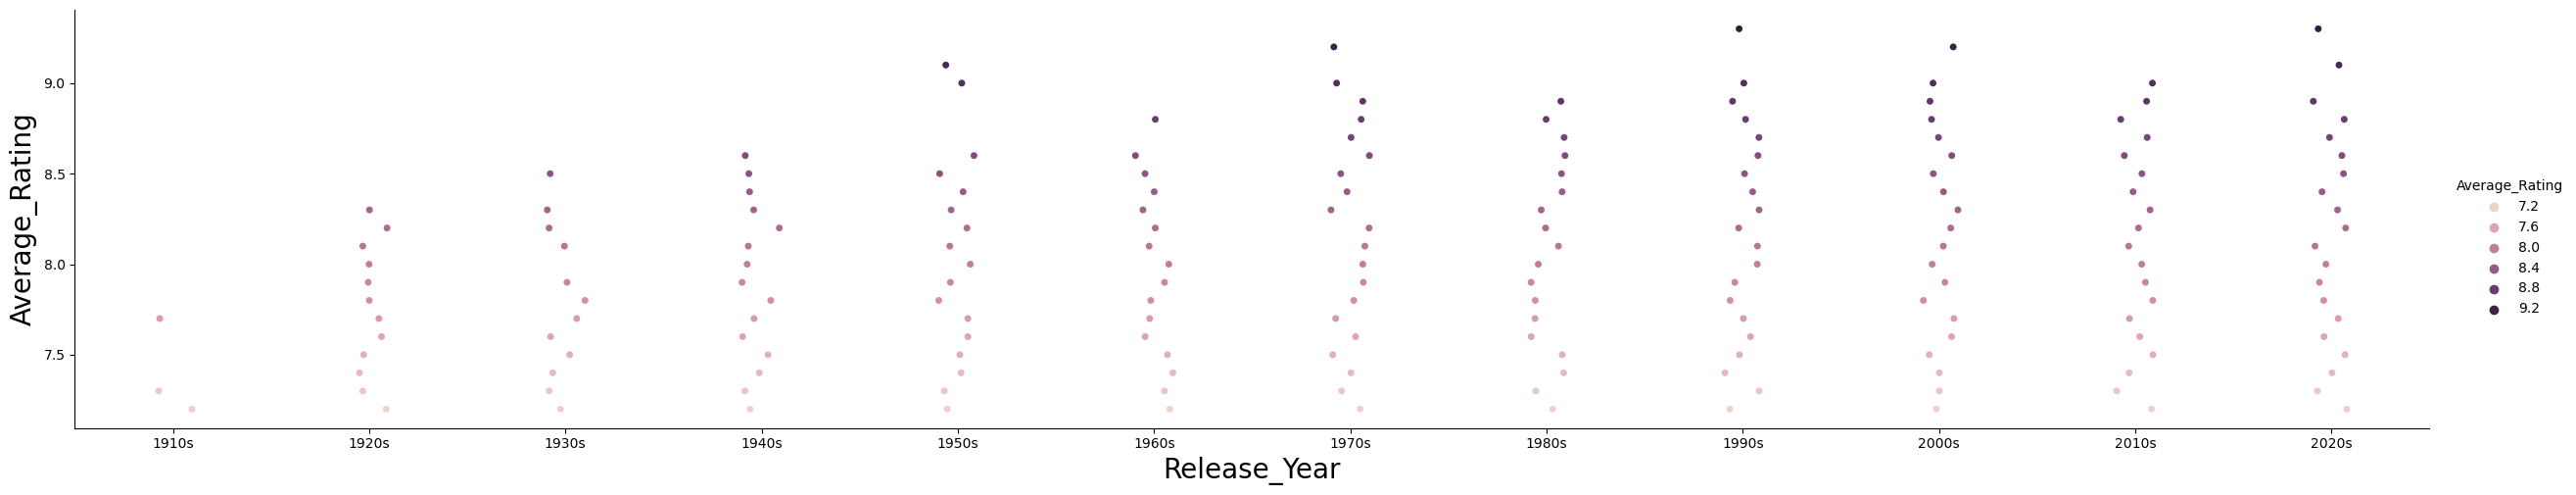

In [60]:
def year_bin(year):
    if pd.notnull(year):
        return f"{(year // 10) * 10}s"
    return 'Unknown'

movie_data['Decade'] = movie_data['Release Year'].apply(year_bin)

decade_counts = movie_data.groupby('Decade')['Average Rating'].value_counts().sort_index()

plt.figure(figsize=(10,4))
sns.catplot(y="Average Rating", x="Decade", hue="Average Rating", data=decade_counts, aspect = 5)
plt.xlabel("Release Year",fontsize=20)
plt.ylabel("Average Rating",fontsize=20)
plt.show()

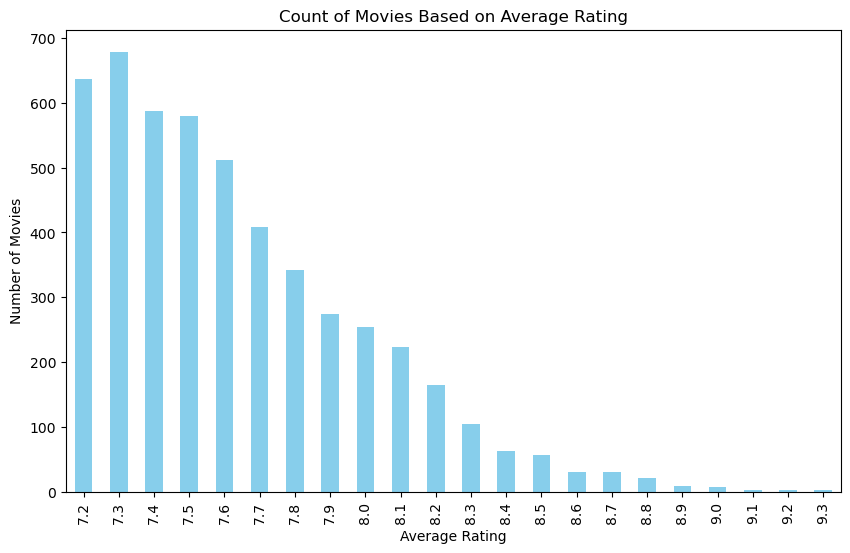

In [61]:
# Group by average rating and count the number of movies for each rating
rating_counts = movie_data['Average Rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Movies Based on Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()

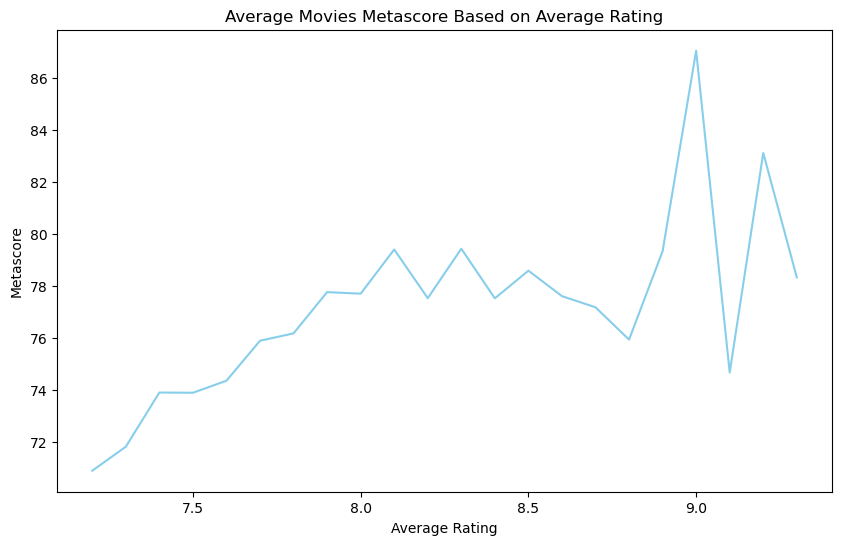

In [62]:
metascore_group = movie_data.groupby('Average Rating')['Metascore'].mean()

plt.figure(figsize=(10, 6))
metascore_group.plot(kind='line', color='skyblue')
plt.title('Average Movies Metascore Based on Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Metascore')
plt.show()

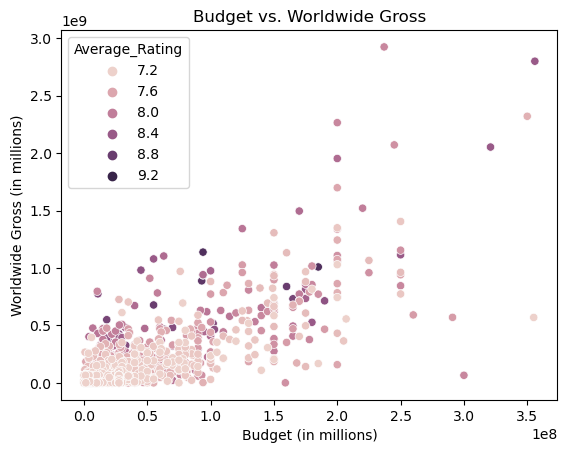

In [63]:
sns.scatterplot(x='Budget', y='Worldwide Gross', data=movie_data, hue="Average Rating")
plt.title('Budget vs. Worldwide Gross')
plt.xlabel('Budget (in millions)')
plt.ylabel('Worldwide Gross (in millions)')
plt.show()

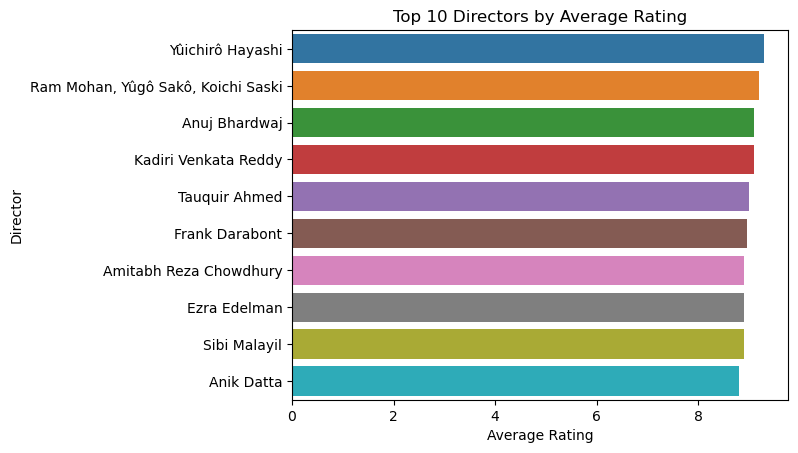

In [64]:
top_directors = movie_data.groupby('Director')['Average Rating'].mean().nlargest(10)

# Plot the top directors
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()

#### Predictive Analysis

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare the data for prediction
X = movie_data[['Budget', 'Runtime', 'Release Year']].dropna()
y = movie_data['Worldwide Gross'].dropna()


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict 
y_pred = lr.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 64386598.63820899
MSE: 1.1641073086049442e+16
R2 Score: 0.5509050354584191


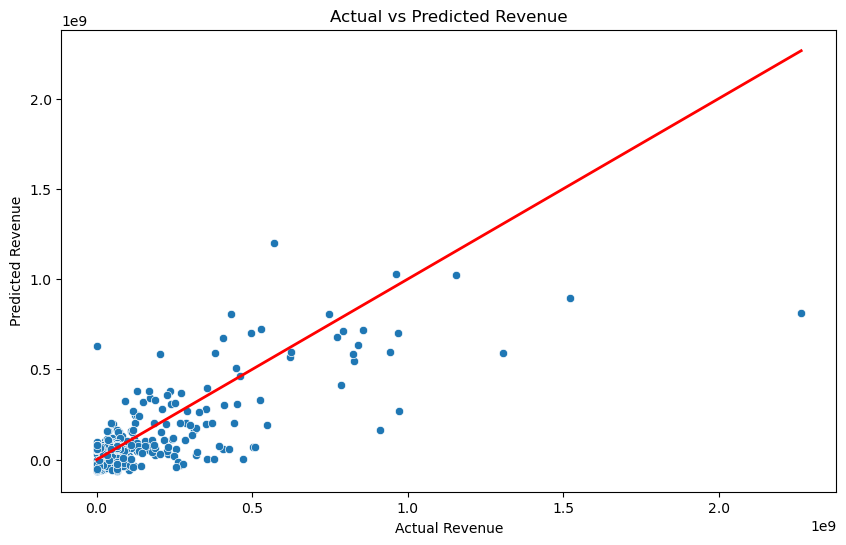

In [71]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()